In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

#from keras import optimizers
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image

# Set the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Data directories
train_dir = r'D:\Downloads\plant disease detection\dataset\train'
valid_dir = r'D:\Downloads\plant disease detection\dataset\valid'

IMAGE_SIZE = (224, 224)
def prepare_image(file):
    # Load the image using target size
    img = image.load_img(file, target_size=IMAGE_SIZE)
    # Convert the image to an array
    img_array = image.img_to_array(img)
    # Expand the dimensions of the image array
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    # Preprocess the image using MobileNet preprocessing function
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

from keras.preprocessing import image
def load_image(img_path, show=False):
    # Load the image and resize it to the specified target size
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    # Convert the image to a NumPy array
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    # Add a batch dimension to match the expected input shape of the model
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels)
    # Normalize the pixel values to the range [0, 1]
    img_tensor /= 255.
    # Display the image if show=True
    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()
    # Return the preprocessed image tensor
    return img_tensor

# Create an instance of the MobileNet model
mobile = keras.applications.mobilenet.MobileNet()

IMAGE_SIZE = (224, 224)
def prepare_image(file):
    # Load the image using Keras' image module and resize it to the specified size
    img = image.load_img(file, target_size=IMAGE_SIZE)
    # Convert the image to a NumPy array
    img_array = image.img_to_array(img)    
    # Expand the dimensions of the image array to match the expected input shape of the model
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)    
    # Preprocess the image using the preprocess_input function specific to the Mobilenet model
    preprocessed_img = keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)
    return preprocessed_img

from tensorflow.keras.preprocessing import image
def load_image(img_path, show=False):
    # Load the image from the specified path and resize it to a predefined target size
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    # Convert the image to a NumPy array representation
    img_tensor = image.img_to_array(img)
    # Expand the dimensions of the image tensor to match the expected input shape for the model
    img_tensor = np.expand_dims(img_tensor, axis=0)
    # Normalize the pixel values of the image by dividing them by 255. to ensure they are in the range [0, 1]
    img_tensor /= 255.
    if show:
        # Display the image if the 'show' parameter is set to True
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()
    # Return the preprocessed image tensor
    return img_tensor

# Import the MobileNet model and discard the last 1000 neuron layer.
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(1024, activation='relu')(x)  # Dense layer 1
x = Dense(1024, activation='relu')(x)  # Dense layer 2
x = Dense(512, activation='relu')(x)  # Dense layer 3
preds = Dense(38, activation='softmax')(x)  # Final layer with softmax activation

# Create a model using the inputs from base_model and the outputs from preds
model = Model(inputs=base_model.input, outputs=preds)
# Print the inputs of the base_model
print(base_model.input)
# Iterate through each layer in the model and print its index and name
for i, layer in enumerate(model.layers):
    print(i, layer.name)

# Iterate over the layers in the model up to index 88 (exclusive)
for layer in model.layers[:88]:
    # Set the trainable property of the layer to False
    layer.trainable = False
# Iterate over the layers in the model from index 88 onwards
for layer in model.layers[88:]:
    # Set the trainable property of the layer to True
    layer.trainable = True

# Print a summary of the model architecture
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
0 input_2
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 c

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
1098
274
Epoch 1/5
1098/1098 [==============================] - 1537s 1s/step - loss: 0.3899 - accuracy: 0.8768 - val_loss: 0.2682 - val_accuracy: 0.9102
Epoch 2/5
1098/1098 [==============================] - 1494s 1s/step - loss: 0.2051 - accuracy: 0.9307 - val_loss: 0.1969 - val_accuracy: 0.9341
Epoch 3/5
1098/1098 [==============================] - 1447s 1s/step - loss: 0.1702 - accuracy: 0.9420 - val_loss: 0.1927 - val_accuracy: 0.9353
Epoch 4/5
1098/1098 [==============================] - 1413s 1s/step - loss: 0.1569 - accuracy: 0.9456 - val_loss: 0.1764 - val_accuracy: 0.9435
Epoch 5/5
1098/1098 [==============================] - 1394s 1s/step - loss: 0.1343 - accuracy: 0.9541 - val_loss: 0.1475 - val_accuracy: 0.9485


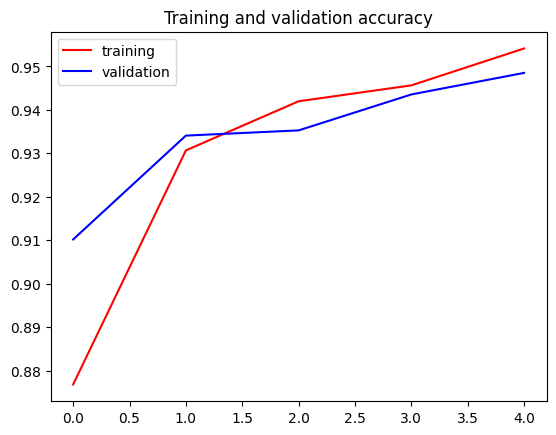

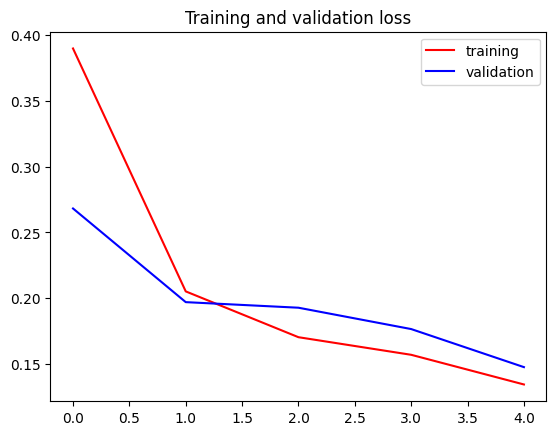

In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

BATCH_SIZE = 64
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30, ###40,
    width_shift_range=0.1, ###0.2,
    height_shift_range=0.1, ###0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# Note that the val data should not be augmented!
test_datagen= ImageDataGenerator    (rescale=1./255)
# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=IMAGE_SIZE, 
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        shuffle=True)
# Flow validation images in batches using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True)

import scipy
# Set the number of epochs
EPOCHS = 5
# Calculate the step size for training and validation data
step_size_train = train_generator.n // train_generator.batch_size
step_size_validation = validation_generator.n // validation_generator.batch_size
# Print the calculated step sizes
print(step_size_train)
print(step_size_validation)
# Train the model using the training generator and validate using the validation generator
# Use the calculated step sizes, epochs, and shuffle the data
history = model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=step_size_validation,
    shuffle=True
)

import matplotlib.pyplot as plt
import os
%matplotlib inline
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Retrieve a list of loss results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
# Get number of epochs
epochs = range(len(acc))
# Specify the base filename and starting number
base_filename_a = "accuracy"
# Initialize the number to start from
number_a = 1
# Check if the file already exists
while os.path.exists(f"{base_filename_a}{number_a}.png"):
    number_a += 1
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label='training')
plt.plot(epochs, val_acc, 'b', label='validation')
plt.title('Training and validation accuracy')
plt.legend()
# Save the plot as accuracy{number}.png
plt.savefig(f"{base_filename_a}{number_a}.png")
plt.figure()
# Specify the base filename and starting number
base_filename_l = "loss"
number_l = 1
# Check if the file already exists
while os.path.exists(f"{base_filename_l}{number_l}.png"):
    number_l += 1
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label='training')
plt.plot(epochs, val_loss, 'b', label='validation')
plt.title('Training and validation loss')
plt.legend()
# Save the plot with the incremented number
plt.savefig(f"{base_filename_l}{number_l}.png")  

import os
# Define the base file name
base_filename_t = "trained"
# Initialize the number to start from
number_t = 1
# Generate the initial file name
filename = f"{base_filename_t}{number_t}.h5"
# Check if the file already exists
while os.path.exists(filename):
    # Increment the number
    number_t += 1
    # Generate the new file name
    filename = f"{base_filename_t}{number_t}.h5"
# Save the trained model to the file
model.save(filename)

In [4]:
import os
import glob
import re
import shutil
from PIL import Image, ImageDraw, ImageFont

# Find all the saved model files in the folder
model_files = glob.glob('trained*.h5')
# Sort the model files based on the numerical part of their names
model_files.sort(key=lambda f: int(re.sub('\D', '', f)))
# Get the latest trained model file
latest_model_file = model_files[-1]
# Load the latest trained model
model = tf.keras.models.load_model(latest_model_file)
# Display the model summary
model.summary()

class_names=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry____healthy', 'Cherry____Powdery_mildew', 'Corn____Cercospora_leaf_spot_Gray_leaf_spot', 'Corn____Common_rust', 'Corn____healthy', 'Corn____Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___healthy', 'Heart_Leaf_Philodendron_citrus_greening', 'Heart_Leaf_Philodendron_healthy', 'Orange___Citrus_greening', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Polka_Dot_healthy', 'Potato___healthy', 'Potato___Late_blight', 'Potato__Early_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch' 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot']

test_dir = r'D:\Downloads\plant disease detection\test'  # Directory path for test images
# Create a list of file paths by searching for all files with the extension ".JPG" in the test directory
list_of_files = glob.glob(test_dir + '/*.JPG')
# Print the number of files found in the test directory
print(len(list_of_files))
# Print the test directory path
print(test_dir)

# Randomly choose a picture to test your model
img_number = int(np.random.randint(0, len(list_of_files), size=1))
test_image = list_of_files[img_number]
# Load and preprocess the image
new_image = load_image(test_image)
# Make predictions using the pre-trained model
pred = model.predict(new_image)
if len(pred) > 0:
    print(pred[0])
    # Retrieve the predicted class label
    prediction_result = class_names[np.argmax(pred[0])]
    print('prediction=', prediction_result)
    # Load the image
    img = Image.open(test_image) 
    # Create a draw object
    draw = ImageDraw.Draw(img)
    # Specify the font and size
    font_size = int(20 * 0.5)  # Decrease the font size to 3/4
    font = ImageFont.truetype("arial.ttf", size=font_size)
    # Define the text and its position
    text = f"Prediction: {prediction_result}"
    text_position = (10, 10)
    # Draw the text on the image
    draw.text(text_position, text, fill=(255, 255, 255), font=font)
    # Show the image
    img.show()
    # Create the predictions folder if it doesn't exist
    predictions_folder = "predictions"
    os.makedirs(predictions_folder, exist_ok=True)
    # Save the image with the prediction in the predictions folder
    filename = os.path.basename(test_image)
    output_path = os.path.join(predictions_folder, f"prediction_{filename}")
    img.save(output_path)
    # Display the saved image
    saved_img = Image.open(output_path)
else:
    print("No predictions available for the given image.")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      